# Brute Force

In this notebook, we explore the results generated by the `bruteforce.sh` script, where we basically just throw a bunch of compute at the problem and see what happens for different configurations.

The configurations that we explore are:
  - BL: baseline, so no experience replay, no target network
  - ER: only experience replay (replay buffer size 10k)
  - TN: only target network (update frequency 1k)
  - TR: both target network and experience replay (same hyperparameters as above)

The other settings are as follows:
  - number of individual runs: 6
  - number of episodes: 50k
  - network architecture: 2 hidden layers with 24 units each (ReLU activation)
  - exploration strategy: $\varepsilon$-greedy
  - annealing scheme: $\varepsilon$ is exponentially annealed from 1 to 0.01 over 80% of the episodes
  - batch size: 512
  - learning rate ($\alpha$): 0.0001 (Adam optimizer)
  - discount factor ($\gamma$): 0.999

## Preliminaries

In [1]:
import os

from dql.utils.namespaces import P
from dql.utils.datamanager import ConcatDataManager
from dql.utils.plotter import ColorPlot, LossPlot

import numpy as np
import matplotlib.pyplot as plt

Check if we have the data.

Should be BL, ER, TN, and TR.

In [2]:
expID = 'BF'
expName = 'Brute Force'
runIDs = [f for f in os.listdir(P.data) if f.startswith(expID + '-')]
print('\n'.join(runIDs))

BF-BL
BF-TR
BF-TN
BF-ER


Check if the parameters are correct.
We check for the run using the `TR` config, since it will contain all the hyperparameters.

In [3]:
ConcatDataManager(f'{expID}-TR').printSummary()

meta:
	runID: BF-TR
	numRepetitions: 6
	numEpisodes: 50000
	runs: 6
params:
	explorationStrategy: egreedy
	annealingScheme:
		id: 1
		startVal: 1.0
		endVal: 0.01
		window: 0.8
		kind: exponential
	experienceReplay: True
	targetNetwork: True
	replayBufferSize: 100000
	targetFrequency: 2500
	alpha: 0.0010
	gamma: 0.9990
	batchSize: 512
results:
	avgRuntime: 01:06:49.700 hr
	avgReward: 43.4914
	avgActionBias: 0.5715
	avgLoss: 1.0454


## Plotting

Define a function to easily get all figures for a given run.

In [4]:
runNames = {'BL': 'Baseline', 'ER': 'Experience Replay', 'TN': 'Target Network', 'TR': 'Target Network + Experience Replay'}

def getFigs(runID: str) -> tuple[plt.Figure]:
    title = f'{runNames[runID]}\n{expName}'
    DM = ConcatDataManager(f'{expID}-{runID}')

    R = DM.loadRewards()
    fR = ColorPlot(R, label='reward', title=title).getFig()

    A = DM.loadActions()
    AB = np.abs((A / np.sum(A, axis=2, keepdims=True))[:, :, 0] - .5) * 2
    fAB = ColorPlot(AB, label='action bias', title=title).getFig()

    L = DM.loadLosses()
    fL = LossPlot(L, title=title).getFig()
    return fR, fAB, fL

---
### Baseline

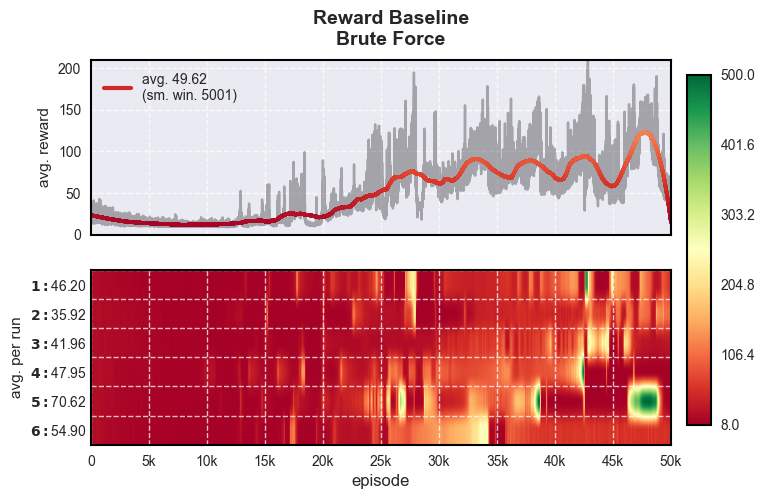

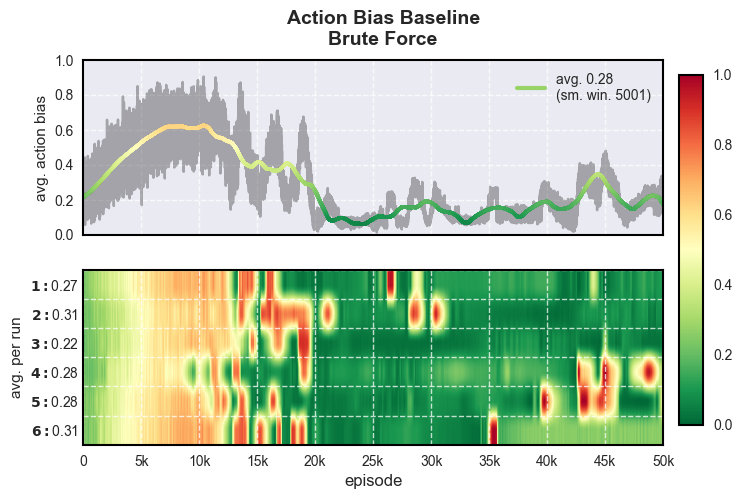

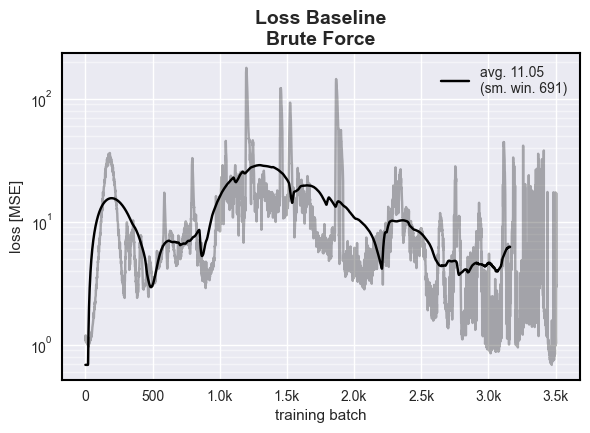

In [5]:
runID = 'BL'
rewardFig, actionBiasFig, lossFig = getFigs(runID)

---
### Experience Replay

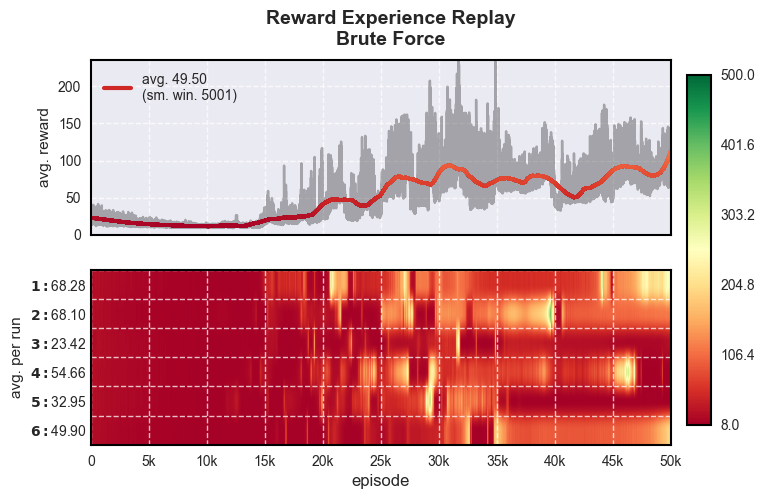

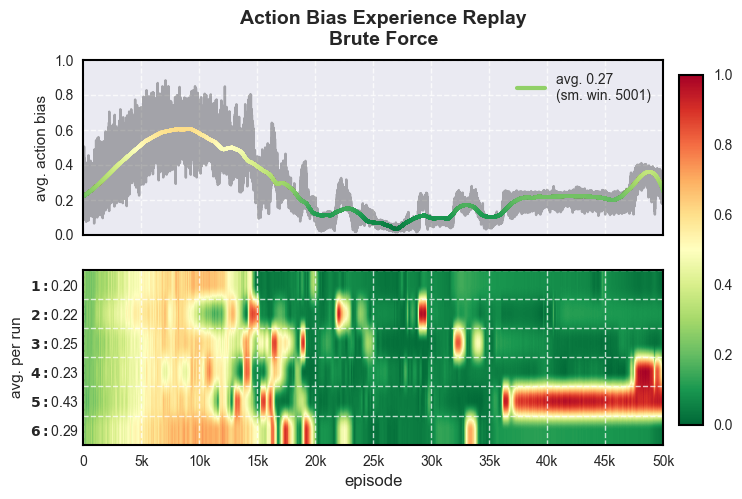

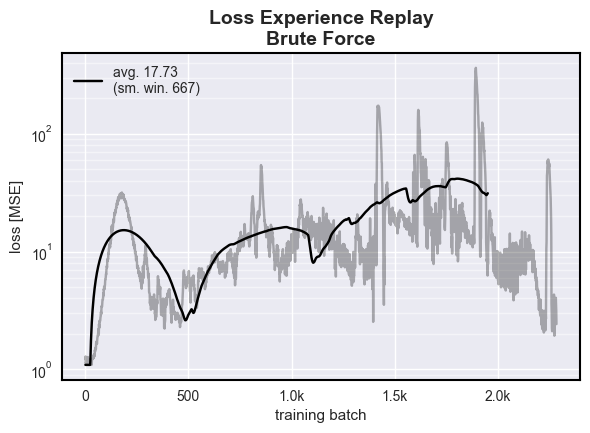

In [6]:
runID = 'ER'
rewardFig, actionBiasFig, lossFig = getFigs(runID)

---
### Target Network

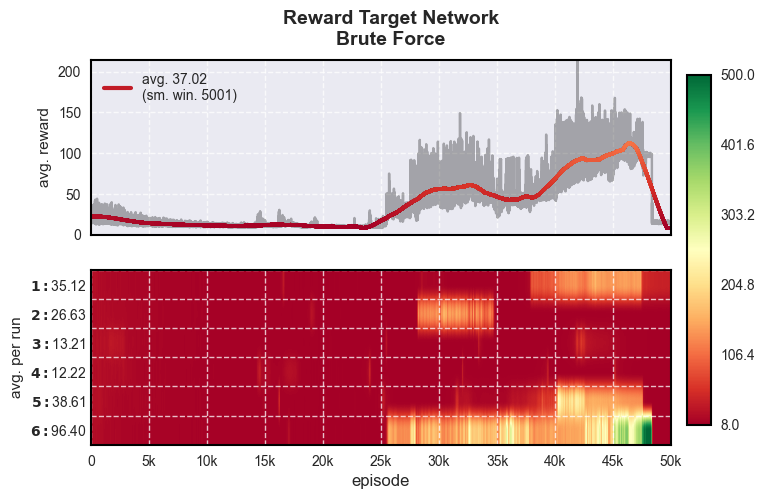

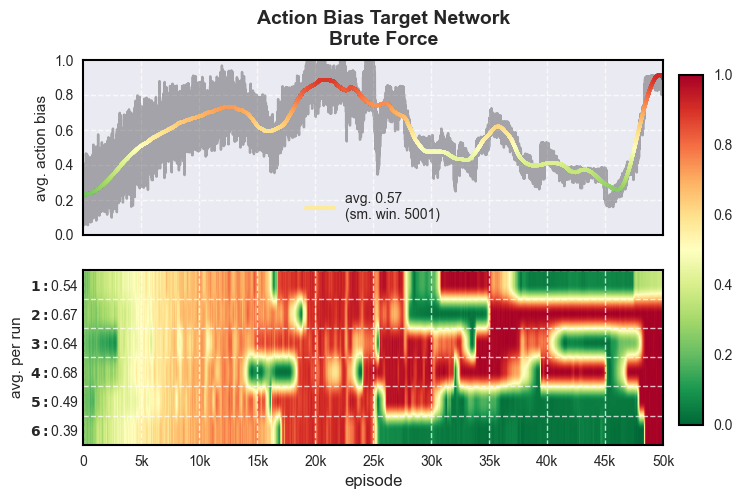

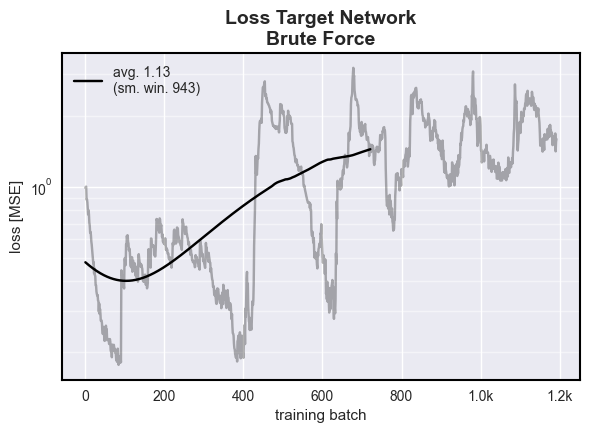

In [7]:
runID = 'TN'
rewardFig, actionBiasFig, lossFig = getFigs(runID)

---
### Target Network + Experience Replay

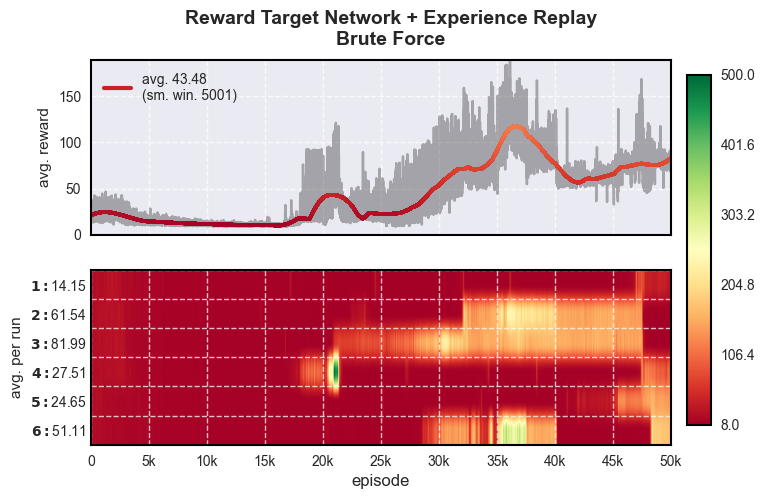

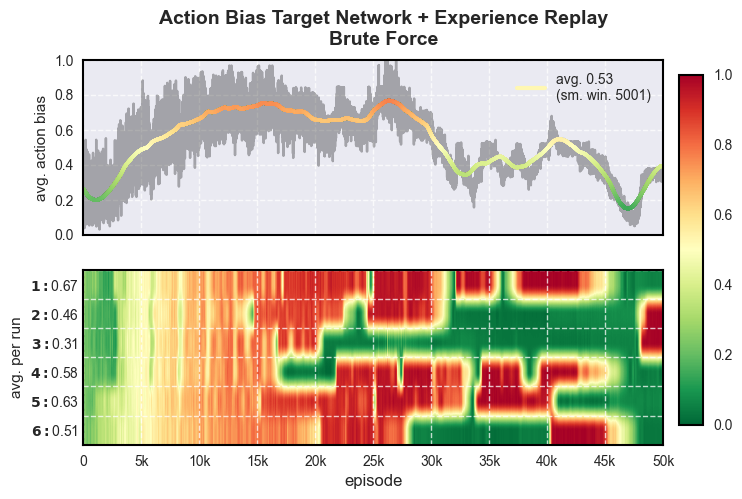

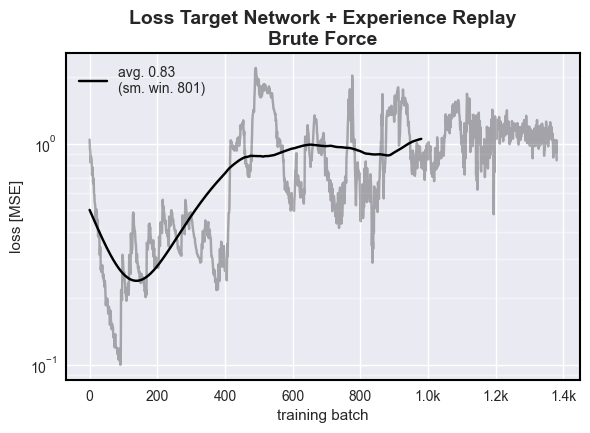

In [8]:
runID = 'TR'
rewardFig, actionBiasFig, lossFig = getFigs(runID)